In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read into the DataFrame
df = pd.read_csv('../data/raw_data_salesforce.csv')

# Drop any stray index column that pandas added
#if 'Unnamed: 0' in df.columns:
    #df = df.drop(columns=['Unnamed: 0'])

# Check
print("Loaded", len(df), "rows and", len(df.columns), "columns.")

Loaded 1050 rows and 10 columns.


In [3]:
# Show the first few rows
print("=== Data Preview ===")
display(df.head())

# Show column names + their dtypes
print("\n=== Column Data Types ===")
print(df.dtypes)

# Show descriptive statistics
print("\n=== Data Descriptive Statistics ===")
print(df.describe())


=== Data Preview ===


,Unnamed: 0,Transaction_ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,1,24/11/23,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,1,2,27/2/23,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,2,3,13/1/23,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,3,4,20/4/23,CUST004,Female,5.0,NaN,1.0,20.0,20.0
4,4,5,21/5/23,CUST005,Male,37.0,Clothing,1.0,500.0,500.0



=== Column Data Types ===
Unnamed: 0            int64
Transaction_ID        int64
Date                 object
Customer ID          object
Gender               object
Age                 float64
Product Category     object
Quantity            float64
Price per Unit      float64
Total Amount        float64
dtype: object

=== Data Descriptive Statistics ===
        Unnamed: 0  Transaction_ID          Age     Quantity  Price per Unit  \
count  1050.000000     1050.000000  1014.000000  1013.000000     1011.000000   
mean    524.500000      525.500000    41.135108     2.490622      178.090999   
std     303.253195      303.253195    13.967191     1.179184      189.457709   
min       0.000000        1.000000    -8.000000    -4.000000      -30.000000   
25%     262.250000      263.250000    29.000000     1.000000       30.000000   
50%     524.500000      525.500000    42.000000     3.000000       50.000000   
75%     786.750000      787.750000    53.000000     4.000000      300.000000   
ma

In [ ]:
# Count how many NaNs in each column
nan_counts = df.isna().sum()

# Convert to percentage of total rows
nan_percents = (nan_counts / len(df) * 100).round(2)

# Bundle into a single table
missing_report = pd.DataFrame({
    'nan_count':   nan_counts,
    'nan_percent': nan_percents
})

print("=== Missing Values by Column ===")
display(missing_report)

=== Missing Values by Column ===


,nan_count,nan_percent
Transaction_ID,0,0.00
Date,0,0.00
Customer ID,0,0.00
Gender,16,1.52
Age,36,3.43
Product Category,8,0.76
Quantity,37,3.52
Price per Unit,39,3.71
Total Amount,41,3.90


NaNs
We observe small % of NaNs per column

In [5]:
# Automatically find numeric columns, excluding any whose name starts with 'Unnamed'
numeric_cols = [
    col
    for col in df.select_dtypes(include='number').columns
    if not col.startswith('Unnamed')
]

# Count values ≤ 0 in each selected numeric column
neg_counts = (df[numeric_cols] <= 0).sum()
neg_percents = (neg_counts / len(df) * 100).round(2)

negative_report = pd.DataFrame({
    'neg_count':   neg_counts,
    'neg_percent': neg_percents
})

print("=== Negative Values by Column (excluding 'Unnamed') ===")
display(negative_report)

=== Negative Values by Column (excluding 'Unnamed') ===


,neg_count,neg_percent
Transaction_ID,0,0.00
Age,2,0.19
Quantity,8,0.76
Price per Unit,4,0.38
Total Amount,5,0.48


Negative values
We Observe small % of negative values per column

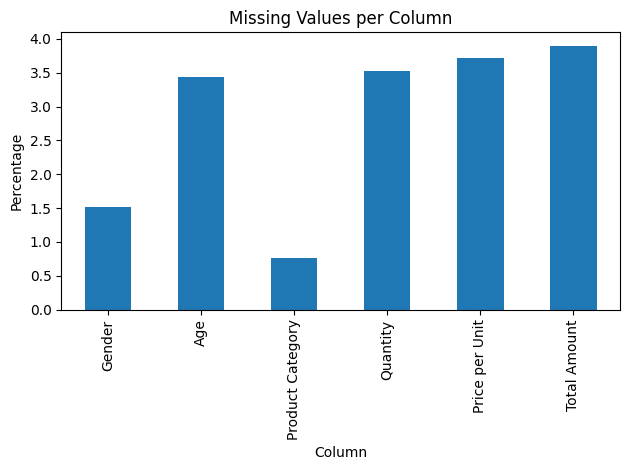

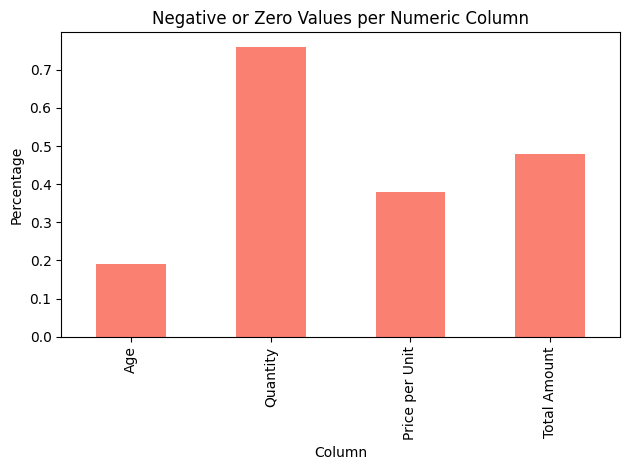

In [21]:
# Bar chart for missing values
cleaned_missing_values = missing_report[4:]

cleaned_missing_values['nan_percent'].plot(kind='bar')
plt.title("Missing Values per Column")
plt.xlabel("Column"); plt.ylabel("Percentage")
plt.tight_layout()
plt.show()


# Bar chart for negative values
cleaned_negative_report = negative_report[1:]
cleaned_negative_report['neg_percent'].plot(kind='bar', color='salmon')
plt.title("Negative or Zero Values per Numeric Column")
plt.xlabel("Column"); plt.ylabel("Percentage")
plt.tight_layout()
plt.show()


=== Number of NaNs per Row ===


,row_count
num_nans,
0,1005
1,3
2,2
3,4
4,23
5,12
6,1


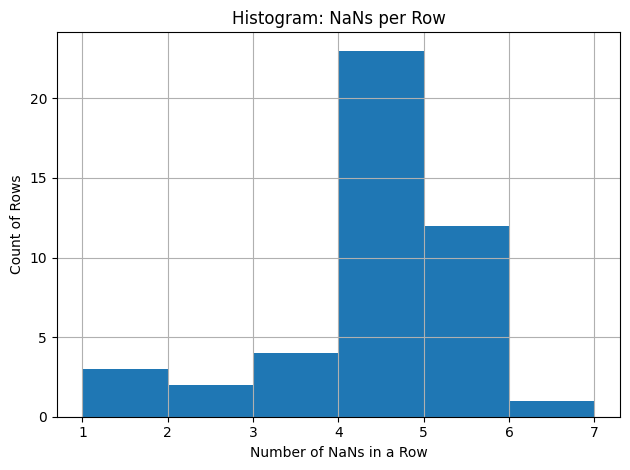

In [46]:
# Histogram NaNs

nan_per_row = df.isna().sum(axis=1)
dist = nan_per_row.value_counts().sort_index()

print("=== Number of NaNs per Row ===")
display(dist.rename_axis('num_nans').rename('row_count').to_frame())

    # Histogram
nan_per_row.hist(bins=range(1,6+2))
plt.title("Histogram: NaNs per Row")
plt.xlabel("Number of NaNs in a Row")
plt.ylabel("Count of Rows")
plt.tight_layout()
plt.show()


In [47]:
# Keep track of how many rows we started with
initial_rows = len(df)

# 1) Drop any row that has at least one NaN
df_clean = df.dropna()

# 2) Then drop any row with a negative in a numeric column & where Age > 18
df_clean = df_clean[
    ((df_clean[numeric_cols] >= 1).all(axis=1))
    & (df_clean['Age'] >= 18)
    ]


# How many we got removed?
cleaned_rows = len(df_clean)
removed = initial_rows - cleaned_rows

print(f"Initial rows:   {initial_rows}")
print(f"After cleaning: {cleaned_rows}")
print(f"Rows removed:   {removed}")

df_clean.to_csv('cleaned_data.csv', index=False)
print("Saved cleaned_data.csv")

Initial rows:   1050
After cleaning: 1000
Rows removed:   50
Saved cleaned_data.csv
